In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import PIL
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
data_dir = r'C:\Users\abhay\OneDrive\Desktop\dataset\Flowers'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/abhay/OneDrive/Desktop/dataset/Flowers')

In [4]:
flowers_images_dict = {
    'rose': list(data_dir.glob('rose/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflower/*')),
    'tulip': list(data_dir.glob('tulip/*')),
}

flowers_labels_dict = {
    'rose': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulip': 4,
}

In [5]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        try:
           resized_img = cv2.resize(img,(224,224))
        except:
            continue
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [6]:
print(X[0])

[[[ 0 15  6]
  [ 0 15  6]
  [ 0 16  7]
  ...
  [24 51 31]
  [25 52 32]
  [26 53 33]]

 [[ 8 22 14]
  [ 8 22 14]
  [ 7 21 14]
  ...
  [21 47 31]
  [24 49 34]
  [25 51 35]]

 [[12 22 15]
  [12 22 15]
  [11 22 14]
  ...
  [21 43 31]
  [24 46 33]
  [26 48 36]]

 ...

 [[17 29 25]
  [14 25 20]
  [13 22 15]
  ...
  [ 2 11  2]
  [ 0  7  1]
  [ 0  4  0]]

 [[19 30 28]
  [18 28 25]
  [16 25 19]
  ...
  [ 2 10  2]
  [ 1  8  2]
  [ 0  7  2]]

 [[ 9 19 19]
  [15 23 22]
  [19 27 24]
  ...
  [ 1 11  2]
  [ 2 10  3]
  [ 3 11  4]]]


In [7]:
print(len(X))

4932


In [8]:
flowers_images_dict.keys()

dict_keys(['rose', 'daisy', 'dandelion', 'sunflower', 'tulip'])

In [9]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
X = np.array(X)
y = np.array(y)
X.shape

(4932, 224, 224, 3)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_test[0]

array([[[252., 185., 159.],
        [254., 191., 149.],
        [253., 189., 160.],
        ...,
        [250., 194., 158.],
        [249., 187., 148.],
        [253., 194., 153.]],

       [[252., 192., 148.],
        [245., 197., 143.],
        [222., 185., 149.],
        ...,
        [226., 183., 150.],
        [249., 196., 154.],
        [254., 194., 148.]],

       [[253., 193., 158.],
        [197., 160., 124.],
        [129., 114., 106.],
        ...,
        [128., 114., 105.],
        [195., 155., 129.],
        [248., 190., 153.]],

       ...,

       [[252., 195., 153.],
        [203., 171., 129.],
        [151., 129., 115.],
        ...,
        [146., 126., 113.],
        [204., 172., 132.],
        [243., 191., 151.]],

       [[255., 188., 151.],
        [249., 197., 152.],
        [239., 187., 160.],
        ...,
        [236., 189., 162.],
        [247., 194., 149.],
        [253., 190., 152.]],

       [[254., 191., 152.],
        [253., 191., 151.],
        [253., 1

In [12]:
len(X_train)

3699

In [13]:
len(X_test)

1233

In [14]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [15]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_train.shape

(3699, 5)

In [16]:
y_train.shape

(3699, 5)

0


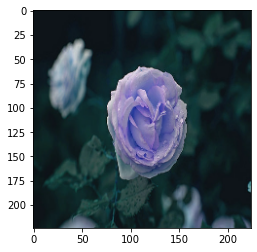

In [17]:
plt.imshow(X[100])
print(y[100])

In [18]:
mobilenet = keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                   include_top=False,
                                                   weights='imagenet')
mobilenet.trainable = True
for layer in mobilenet.layers[:120]:
  layer.trainable = False
len(mobilenet.layers)

154

In [19]:
inputs = keras.Input(shape=(224, 224, 3))
x = mobilenet(inputs, training=False)
x=tf.keras.layers.Dropout(0.33)(x)
x=tf.keras.layers.Dense(32,activation=('relu'))(x)
x=tf.keras.layers.Dense(32,activation=('relu'))(x)
x=tf.keras.layers.Dropout(0.33)(x)
x=tf.keras.layers.Dense(64,activation=('relu'))(x)
x=tf.keras.layers.Dense(64,activation=('relu'))(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(128,activation=('relu'))(x)
x=tf.keras.layers.Dense(128,activation=('relu'))(x)
x=tf.keras.layers.Dropout(0.33)(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(5)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1280)        0         
_________________________________________________________________
dense (Dense)                (None, 7, 7, 32)          40992     
_________________________________________________________________
dense_1 (Dense)              (None, 7, 7, 32)          1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 7, 7, 64)          2112  

In [20]:
 model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [21]:
H = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test), epochs=50)

Epoch 1/50
116/116 [==============================] - 28s 136ms/step - loss: 1.5889 - accuracy: 0.2447 - val_loss: 1.5056 - val_accuracy: 0.3650
Epoch 2/50
116/116 [==============================] - 12s 107ms/step - loss: 1.3613 - accuracy: 0.4582 - val_loss: 1.0067 - val_accuracy: 0.5945
Epoch 3/50
116/116 [==============================] - 12s 106ms/step - loss: 0.9372 - accuracy: 0.6559 - val_loss: 0.7010 - val_accuracy: 0.7526
Epoch 4/50
116/116 [==============================] - 12s 106ms/step - loss: 0.7230 - accuracy: 0.7480 - val_loss: 0.6390 - val_accuracy: 0.7899
Epoch 5/50
116/116 [==============================] - 12s 105ms/step - loss: 0.5939 - accuracy: 0.7913 - val_loss: 0.5563 - val_accuracy: 0.8070
Epoch 6/50
116/116 [==============================] - 12s 105ms/step - loss: 0.4935 - accuracy: 0.8354 - val_loss: 0.4569 - val_accuracy: 0.8459
Epoch 7/50
116/116 [==============================] - 12s 106ms/step - loss: 0.4246 - accuracy: 0.8600 - val_loss: 0.4285 - val_ac

In [22]:
model.evaluate(X_test_scaled,y_test)

39/39 [==============================] - 3s 63ms/step - loss: 0.4886 - accuracy: 0.9132


[0.4886425733566284, 0.9132198095321655]

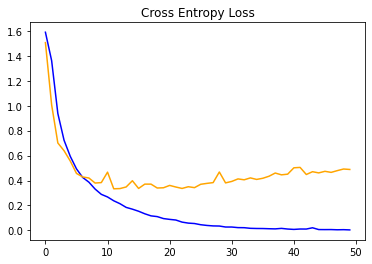

In [23]:
from matplotlib import pyplot
pyplot.title('Cross Entropy Loss')
pyplot.plot(H.history['loss'], color='blue', label='train')
pyplot.plot(H.history['val_loss'], color='orange', label='test')